# Introduction:
   I have a dataset of Easyvisa. Easy visa is a travel agency. My task is to Analyze and fetch information from the data to  Facilitate the process of visa approvals and Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. Data Science is helping people in various socioeconomic and health sectors. Therefore, we realize the need for data and data scientists to help the world become a better place. We need to learn Data Science to create better solutions for real-world problems that people face today. So here we are going to find out our answers with the help of data science.
   
   
<h2>What  I am going to do?</h2>
I will do data analysis into two segments. I will slice the data by the case_status column which is the target column, I will separate the data frame into the "Certified" and "Denied" datasets. Then I will visualize the features one by one and give the conclusions on plotted Graphs. Then I will do Data preprocessing and clean the dataset, Then based on the dataset I will build the model. So I will do this project in two parts first I will visualize the features and then I will train the model.

<h3>Features</h3>
1) case_id: ID of each visa application.<br>
2) continent: Information of continent the employee.<br>
3) education_of_employee: Information of education of the employee.<br>
4) has_job_experience: Does the employee has any job experience? Y= Yes; N = No.<br>
5) requires_job_training: Does the employee require any job training? Y = Yes; N = No.<br>
6) no_of_employees: Number of employees in the employer's company.<br>
7) yr_of_estab: Year in which the employer's company was established.<br>
8) region_of_employment: Information of foreign worker's intended region of employment in the US.<br>
9) prevailing_wage: Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.<br>
10) unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.<br>
11) full_time_position: Is the position of work full-time? Y = Full-Time Position; N = Part-Time Position.<br>
12) case_status: Flag indicating if the Visa was certified or denied (Target column).<br>


<h1>Import necessary Libraries</h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import warnings
warnings.filterwarnings("ignore")
from IPython.display import display_html
style.use('ggplot')
import seaborn as sns
import numpy as np

<h1>Creating a dataframe</h1>

In [2]:
df = pd.read_csv("EasyVisa.csv")
print(df.shape)
df.head()

(25480, 12)


,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


<h1>Checking for null values</h1>

In [3]:
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

So this dataset does not contains any null values which is a good sign.

In [4]:
df.dtypes

case_id                   object
continent                 object
education_of_employee     object
has_job_experience        object
requires_job_training     object
no_of_employees            int64
yr_of_estab                int64
region_of_employment      object
prevailing_wage          float64
unit_of_wage              object
full_time_position        object
case_status               object
dtype: object

So there Only three numerical features and the others are categorical and the target column is also categorical

<h3>Creating a list of object columns</h3>

In [5]:
object_columns=[x for x in df.columns if df[x].dtype=='object']
object_columns.pop(0)

'case_id'

<h3>Checking the value counts of object columns</h3>

In [6]:
for i in object_columns:
    print('-------------------------------------')
    print('classes counts of {} : \n'.format(i),df[i].value_counts())

-------------------------------------
classes counts of continent : 
 Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
-------------------------------------
classes counts of education_of_employee : 
 Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
-------------------------------------
classes counts of has_job_experience : 
 Y    14802
N    10678
Name: has_job_experience, dtype: int64
-------------------------------------
classes counts of requires_job_training : 
 N    22525
Y     2955
Name: requires_job_training, dtype: int64
-------------------------------------
classes counts of region_of_employment : 
 Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, dtype: int64
-------------------------------------
classes counts of 

<h1>Visa Certified</h1>

I am going to separated dataset into two by case_status columns. I will create a dataset which will only contains Certified records and then i will visualize the dataset and see the patterns.


<h2>Satistical Approach:</h2>
<p>My first task is create a structer of statistics. So i am going to find the Certified Percentage ratio of every features and then i will plot graphs on the bases of their percentages</p>
$$Certified_Rate=(Certifed data / Total data)*100 $$

In [7]:
df_certified=df[df['case_status']=='Certified']

In [8]:
Values_continent =[] # List which will contains the Certified percentages by Continent
Labels_continent=[]  # List which will contains the Unique classes by Continent

for i in df_certified['continent'].unique():
    Percentage = len(df_certified[df_certified['continent']==i])/len(df[df['continent']==i]['continent'])*100
    Values_continent.append(Percentage)
    Labels_continent.append(i)
    
Values_edu_of_emp =[] # List which will contains the Certified percentages by education_of_employee
Labels_edu_of_emp =[] # List which will contains the Unique classes by education_of_employee

for i in df_certified['education_of_employee'].unique():
    Percentage = len(df_certified[df_certified['education_of_employee']==i])/len(df[df['education_of_employee']==i]['education_of_employee'])*100
    Values_edu_of_emp.append(Percentage)
    Labels_edu_of_emp.append(i)

Values_region_emp =[] # List which will contains the Certified percentages by region_of_employment
Labels_region_emp =[] # List which will contains the Unique classes by region_of_employment

for i in df_certified['region_of_employment'].unique():
    Percentage = len(df_certified[df_certified['region_of_employment']==i])/len(df[df['region_of_employment']==i]['region_of_employment'])*100
    Values_region_emp.append(Percentage)
    Labels_region_emp.append(i)

values_unit_of_wage =[] # List which will contains the Certified percentages by unit_of_wage
labels_unit_of_wage =[] # List which will contains the Unique classes by unit_of_wage
for i in df_certified['unit_of_wage'].unique():
    Percentage = len(df_certified[df_certified['unit_of_wage']==i])/len(df[df['unit_of_wage']==i]['unit_of_wage'])*100
    values_unit_of_wage.append(Percentage)
    labels_unit_of_wage.append(i)

    
    

<h3>Plotting the Certified percentage rate of features</h3>

Text(0.5, 0.98, 'Certified Ratio with different features')

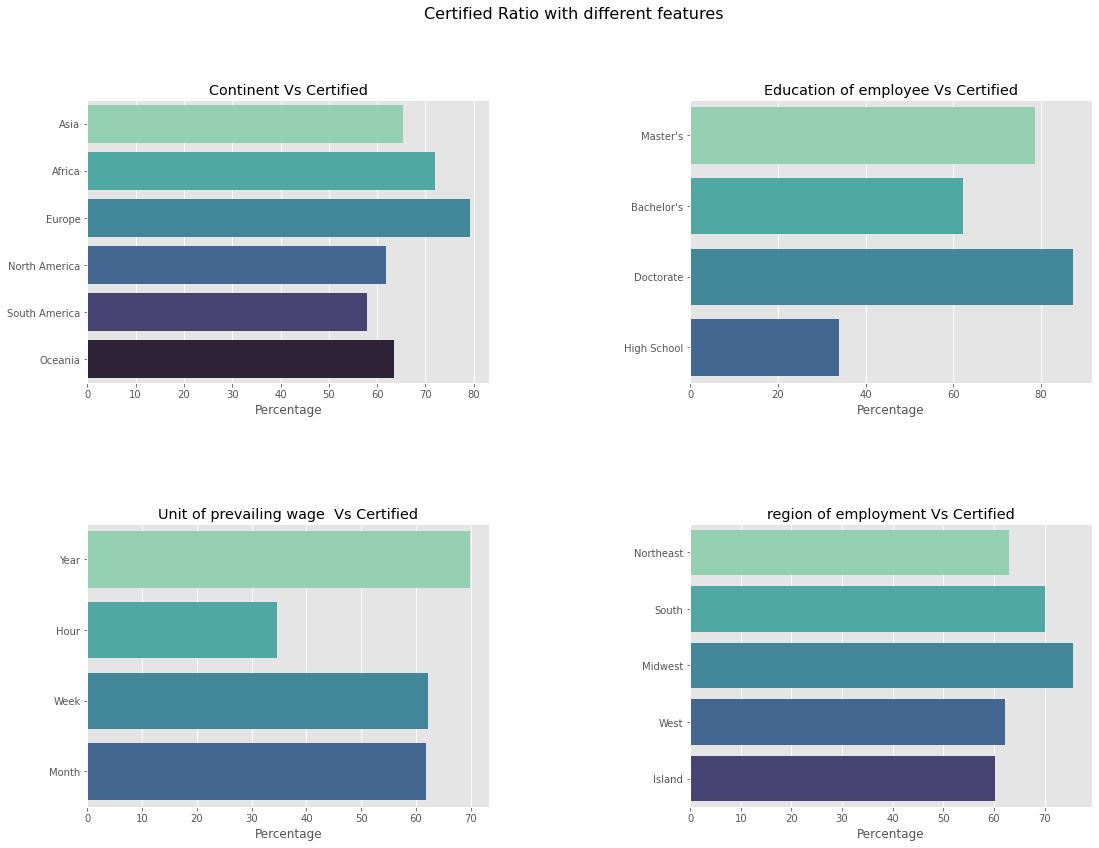

In [9]:
fig,ax=plt.subplots(2,2,figsize=(18,13))
plt.subplots_adjust(hspace=0.5,wspace=0.5)
ax=ax.flatten()
pal = sns.color_palette("mako")
sns.barplot(y=Labels_continent,x=Values_continent,ax=ax[0],palette=np.array(pal[::-1]))
sns.barplot(y=Labels_edu_of_emp,x=Values_edu_of_emp,ax=ax[1],palette=np.array(pal[::-1]))
sns.barplot(y=labels_unit_of_wage,x=values_unit_of_wage,ax=ax[2],palette=np.array(pal[::-1]))
sns.barplot(y=Labels_region_emp,x=Values_region_emp,ax=ax[3],palette=np.array(pal[::-1]))

ax[0].set_title("Continent Vs Certified")
ax[0].set_xlabel("Percentage")
ax[1].set_title("Education of employee Vs Certified")
ax[1].set_xlabel("Percentage")
ax[2].set_title("Unit of prevailing wage  Vs Certified")
ax[2].set_xlabel("Percentage")
ax[3].set_title("region of employment Vs Certified")
ax[3].set_xlabel("Percentage")
fig.suptitle('Certified Ratio with different features', fontsize=16)

<h2>Visa Success Rate by continent  : </h2>
* Asia success rate is <font color='blue'>65.31%</font>.<br>
* Europe success rate is <font color='blue'>79.23%</font>.<br>
* Africa success rate is <font color='blue'>72.05%</font>.<br>
* Oceniasuccess rate is <font color='blue'>63.54</font>.<br>
* South America success rate is <font color='blue'>57.86%</font>.<br>
* North America  success rate is <font color='blue'>61.88%</font>.<br>
<h2>Visa Success Rate by Education level:</h2>
* Master's level success rate is <font color='blue'>78.63%</font>.<br>
* Bachelor's level success rate is <font color='blue'>62.21%</font>.<br>
* Doctorate level rate is <font color='blue'>87.23%</font>.<br>
* High school level success rate is <font color='blue'>34.04%</font>.<br>
<h2>Visa Success Rate by Unit of prevailing wage :</h2>
* Yearly success rate is <font color='blue'>69.88%</font>.<br>
* Monthly success rate is <font color='blue'>61.79%</font>.<br>
* Weekly success rate is <font color='blue'>62.13%</font>.<br>
* Hourly success rate is <font color='blue'>34.63%</font>.<br>
<h2>Visa Success Rate by region of employment:</h2>
* Nourtheast success rate is <font color='blue'>62.90%</font>.<br>
* South success rate is <font color='blue'>70.02%</font>.<br>
* midwest success rate is <font color='blue'>75.53%</font>.<br>
* Island success rate is <font color='blue'>62.25%</font>.<br>

**Note :**
* Eupropeans have the high ratio of getting visa.
* If you have Doctorate , masters and bachelors then the success ratio of getting visa will increase.
* The Yearly prevailing wage has high success ratio.
* If your company region is in midwest then you have high success ratio.


<p>I am going to do same process,Now i am going to find percentage rate by binary class columns</p>

In [10]:
Values_has_job_exp =[]
Labels_has_job_exp =[]

for i in df_certified['has_job_experience'].unique():
    Percentage = len(df_certified[df_certified['has_job_experience']==i])/len(df[df['has_job_experience']==i]['has_job_experience'])*100
    Values_has_job_exp.append(Percentage)
    Labels_has_job_exp.append(i)
    
Values_req_job_train =[]
Labels_req_job_train =[]

for i in df_certified['requires_job_training'].unique():
    Percentage = len(df_certified[df_certified['requires_job_training']==i])/len(df[df['requires_job_training']==i]['requires_job_training'])*100
    Values_req_job_train.append(Percentage)
    Labels_req_job_train.append(i)

Values_full_time_pos =[]
Labels_full_time_pos =[]
for i in df_certified['full_time_position'].unique():
    Percentage = len(df_certified[df_certified['full_time_position']==i])/len(df[df['full_time_position']==i]['full_time_position'])*100
    Values_full_time_pos.append(Percentage)
    Labels_full_time_pos.append(i)
    

In [11]:
def dataframe(labels,values,title):
    """This function will create a  dataframe with help of list which i have beenn defined before"""
    label=pd.DataFrame(labels).rename(columns={0:title})
    values=pd.DataFrame(values).rename(columns={0:'Percentage of Certified'})
    data=pd.concat([label,values],axis=1)
    return data
data_job_exp=dataframe(Labels_has_job_exp,Values_has_job_exp,'has_job_experience')
data_req_job_train=dataframe(Labels_req_job_train,Values_req_job_train,'Require_job_training')
data_full_time_pos=dataframe(Labels_full_time_pos,Values_full_time_pos,'Full time positive')

def styling(data):
    """This function is only for adding colorful pallettes on the dataframe"""
    return data.style.background_gradient(cmap="tab10_r")

styling_job_exp=styling(data_job_exp)
styling_req_job_train=styling(data_req_job_train)
styling_full_time_pos=styling(data_full_time_pos)

In [12]:
"""THis chuck of code only arrage the datarame side by side by html"""


styler_job=styling_job_exp.set_table_attributes("style='display:inline'")
styler_train=styling_req_job_train.set_table_attributes("style='display:inline'")
styler_time_pos=styling_full_time_pos.set_table_attributes("style='display:inline'")
display_html(styler_job._repr_html_()+styler_train._repr_html_()+ styler_time_pos._repr_html_(), raw=True)

,has_job_experience,Percentage of Certified
0,Y,74.476422
1,N,56.134108
,Require_job_training,Percentage of Certified
0,N,66.645949
1,Y,67.884941
,Full time positive,Percentage of Certified
0,Y,66.583235
1,N,68.526044


**Note :**
<p>If you have good job experience then the chance of getting visa will increase</p>

<h1>Visa Denied</h1>
I am going to separate the dataset by case_status column . this dataset only contains Visa rejection records.This will help to look deep into the features and i will help to understand it more preciesly.so i will use the same stats , I will find the percentage of visa rejection by every features

In [13]:
df_denied=df[df['case_status']=='Denied']

In [14]:
values_continent_denied =[]
labels_continent_denied =[]
for i in df_denied['continent'].unique():
    Percentage = len(df_denied[df_denied['continent']==i])/len(df[df['continent']==i]['continent'])*100
    values_continent_denied.append(Percentage)
    labels_continent_denied.append(i)

values_edu_of_emp_denied =[]
labels_edu_of_emp_denied =[]
for i in df_denied['education_of_employee'].unique():
    Percentage = len(df_denied[df_denied['education_of_employee']==i])/len(df[df['education_of_employee']==i]['education_of_employee'])*100
    values_edu_of_emp_denied.append(Percentage)
    labels_edu_of_emp_denied.append(i)

Values_region_emp_denied =[]
Labels_region_emp_denied =[]

for i in df_denied['region_of_employment'].unique():
    Percentage = len(df_denied[df_denied['region_of_employment']==i])/len(df[df['region_of_employment']==i]['region_of_employment'])*100
    Values_region_emp_denied.append(Percentage)
    Labels_region_emp_denied.append(i)

values_unit_of_wage_denied =[]
labels_unit_of_wage_denied =[]
for i in df_denied['unit_of_wage'].unique():
    Percentage = len(df_denied[df_denied['unit_of_wage']==i])/len(df[df['unit_of_wage']==i]['unit_of_wage'])*100
    values_unit_of_wage_denied.append(Percentage)
    labels_unit_of_wage_denied.append(i)


Text(0.5, 0.98, 'Denied Ratio with different features')

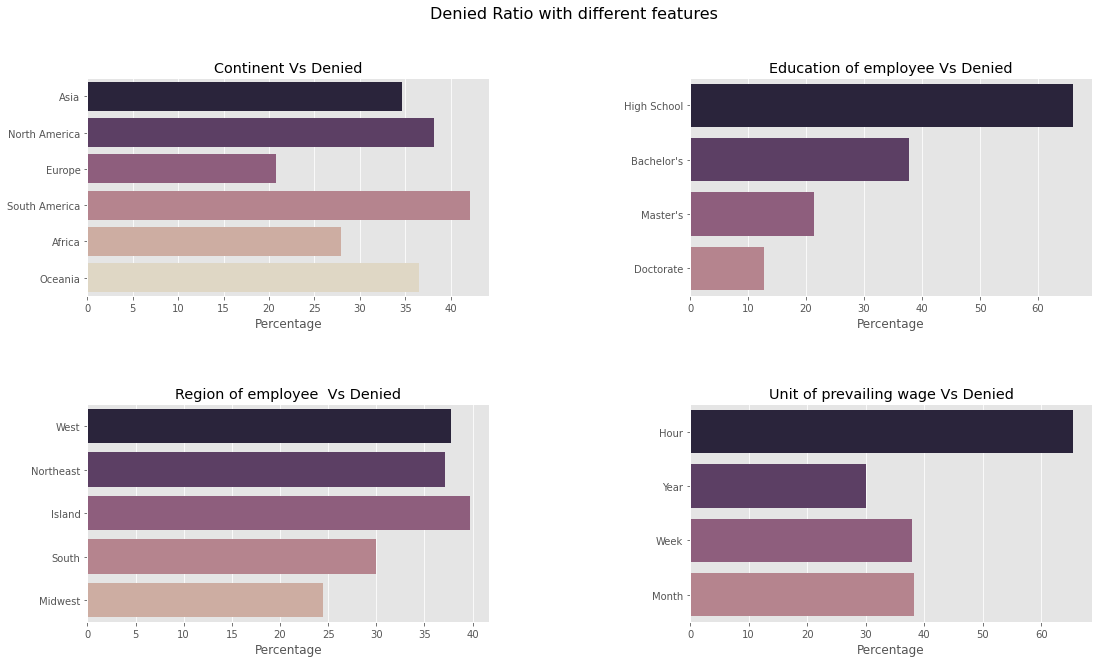

In [15]:
fig,ax=plt.subplots(2,2,figsize=(18,10))
plt.subplots_adjust(hspace=0.5,wspace=0.5)
ax=ax.flatten()
pal = sns.color_palette("ch:s=-.2,r=.6")
sns.barplot(y=labels_continent_denied,x=values_continent_denied,ax=ax[0],palette=np.array(pal[::-1]))
sns.barplot(y=labels_edu_of_emp_denied,x=values_edu_of_emp_denied,ax=ax[1],palette=np.array(pal[::-1]))
sns.barplot(y=Labels_region_emp_denied,x=Values_region_emp_denied,ax=ax[2],palette=np.array(pal[::-1]))
sns.barplot(y=labels_unit_of_wage_denied,x=values_unit_of_wage_denied,ax=ax[3],palette=np.array(pal[::-1]))

ax[0].set_title("Continent Vs Denied")
ax[0].set_xlabel("Percentage")
ax[1].set_title("Education of employee Vs Denied")
ax[1].set_xlabel("Percentage")
ax[2].set_title("Region of employee  Vs Denied")
ax[2].set_xlabel("Percentage")
ax[3].set_title("Unit of prevailing wage Vs Denied")
ax[3].set_xlabel("Percentage")
fig.suptitle('Denied Ratio with different features', fontsize=16)

**Note:**
* South Americans has  high ratio of rejection.
* If you are a high school student then the rejection ratio is very high.
* If your company region is on island then the rejection ratio is very high.
* The hourly prevailing wage has high rejection ratio.


In [16]:
values_has_job_exp_denied =[]
labels_has_job_exp_denied =[]
for i in df_denied['has_job_experience'].unique():
    Percentage = len(df_denied[df_denied['has_job_experience']==i])/len(df[df['has_job_experience']==i]['has_job_experience'])*100
    values_has_job_exp_denied.append(Percentage)
    labels_has_job_exp_denied.append(i)

Values_req_job_train_denied =[]
Labels_req_job_train_denied =[]
for i in df_denied['requires_job_training'].unique():
    Percentage = len(df_denied[df_denied['requires_job_training']==i])/len(df[df['requires_job_training']==i]['requires_job_training'])*100
    Values_req_job_train_denied.append(Percentage)
    Labels_req_job_train_denied.append(i)

Values_full_time_pos_denied =[]
Labels_full_time_pos_denied =[]
for i in df_denied['full_time_position'].unique():
    Percentage = len(df_denied[df_denied['full_time_position']==i])/len(df[df['full_time_position']==i]['full_time_position'])*100
    Values_full_time_pos_denied.append(Percentage)
    Labels_full_time_pos_denied.append(i)


In [17]:
def dataframe_denied(labels,values,title):
    label=pd.DataFrame(labels).rename(columns={0:title})
    values=pd.DataFrame(values).rename(columns={0:'Percentage of Denied'})
    data=pd.concat([label,values],axis=1)
    return data
data_job_exp_den=dataframe_denied(labels_has_job_exp_denied,values_has_job_exp_denied,'has_job_experience')
data_req_job_train_den=dataframe_denied(Labels_req_job_train_denied,Values_req_job_train_denied,'Require_job_training')
data_full_time_pos_den=dataframe_denied(Labels_full_time_pos_denied,Values_full_time_pos_denied,'Full time positive')

In [18]:
styling_job_exp_den=styling(data_job_exp_den)
styling_req_job_train_den=styling(data_req_job_train_den)
styling_full_time_pos_den=styling(data_full_time_pos_den)
#------------------------------------------------------------------------------------------

styler_job_den=styling_job_exp_den.set_table_attributes("style='display:inline'")
styler_train_den=styling_req_job_train_den.set_table_attributes("style='display:inline'")
styler_time_pos_den=styling_full_time_pos_den.set_table_attributes("style='display:inline'")
display_html(styler_job_den._repr_html_()+styler_train_den._repr_html_()+styler_time_pos_den._repr_html_(), raw=True)

,has_job_experience,Percentage of Denied
0,N,43.865892
1,Y,25.523578
,Require_job_training,Percentage of Denied
0,N,33.354051
1,Y,32.115059
,Full time positive,Percentage of Denied
0,Y,33.416765
1,N,31.473956


**Note :**
<p>If you no job experience then your success ratio will decrease  and other features like require job training and full time postive  does not have any major impact on case status. </p>

<h3>Now I am going to visualize the column "yr_of_estab", I will find the visa success rate by "yr_of_estab"</h3>

In [19]:
def Percentage_stats(df,title):
    """ This function will help to find the certified percentage rate 
        of "yr_of_estab". THis function requre the two params df: dataframe , title : which class Certified or Denied
    """
    full_data = df.groupby('yr_of_estab')[['case_status']].count().reset_index() # grouping the full dataset  by "yr_of_estab" with count
    results = df[df['case_status']==title].groupby('yr_of_estab')[['case_status']].count().reset_index() # grouping the Certified dataset 
    #---------------------------------------------------------
    dict_full_data=dict(full_data.values) # Converting the full dataset into dictionary
    dictionary=dict(results.values)  # Converting the Certified dataset into dictionary
    #---------------------------------------------------------
    keys =list(dictionary.keys())  # Making the list of keys of dictionary 
    #---------------------------------------------------------
    Totals = [] # This will contail the total percentages of visa success
    for i in keys:
        Total = (dictionary.get(i)/dict_full_data.get(i))*100
        Totals.append(Total)
        
    #----------------------------------------------------------
    total_dict=dict(zip(keys,Totals))  # Ziping the keys and total percentages and creating dictionary
    data=pd.DataFrame.from_dict(total_dict,orient ='index') # Converting the dictionaey to dataframe
    dataframe = data.reset_index().rename(columns={'index':'yr_of_estab',0:'Percentage of '+str(title)})
    
    return dataframe
    

Text(0, 0.5, 'Percentage of certified')

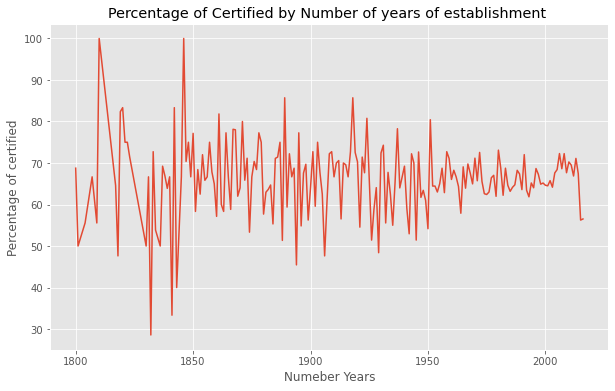

In [20]:
plt.figure(figsize=(10,6))
data_certified=Percentage_stats(df,'Certified')
plt.plot(data_certified['yr_of_estab'],data_certified['Percentage of Certified'])
plt.title("Percentage of Certified by Number of years of establishment ")
plt.xlabel('Numeber Years')
plt.ylabel('Percentage of certified')

**Results**:
<p>As you can see if the company is very old then the success ratio of getting visa will increase.</p>

In [21]:
def Percentage_stats(df,title):
    """ This function will help to find the certified percentage rate 
        of "yr_of_estab". THis function requre the two params df: dataframe , title : which class Certified or Denied
    """
    full_data = df.groupby('yr_of_estab')[['case_status']].count().reset_index() # grouping the full dataset  by "yr_of_estab" with count
    results = df[df['case_status']==title].groupby('yr_of_estab')[['case_status']].count().reset_index() # grouping the Certified dataset 
    #---------------------------------------------------------
    dict_full_data=dict(full_data.values) # Converting the full dataset into dictionary
    dictionary=dict(results.values)  # Converting the Certified dataset into dictionary
    #---------------------------------------------------------
    keys =list(dictionary.keys())  # Making the list of keys of dictionary 
    #---------------------------------------------------------
    Totals = [] # This will contail the total percentages of visa success
    for i in keys:
        Total = (dictionary.get(i)/dict_full_data.get(i))*100
        Totals.append(Total)
        
    #----------------------------------------------------------
    total_dict=dict(zip(keys,Totals))  # Ziping the keys and total percentages and creating dictionary
    data=pd.DataFrame.from_dict(total_dict,orient ='index') # Converting the dictionaey to dataframe
    dataframe = data.reset_index().rename(columns={'index':'yr_of_estab',0:'Percentage of '+str(title)})
    
    return dataframe
    

<AxesSubplot:xlabel='case_status', ylabel='prevailing_wage'>

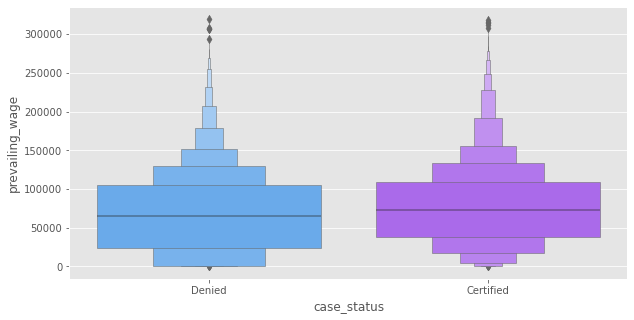

In [22]:
plt.figure(figsize=(10,5))
sns.boxenplot(df["case_status"],df["prevailing_wage"],palette="cool")

**Note:**
There is no Great impact of prevailing_wage on case status however if the the salary is high then visa succusse rate will increase

<AxesSubplot:xlabel='case_status', ylabel='no_of_employees'>

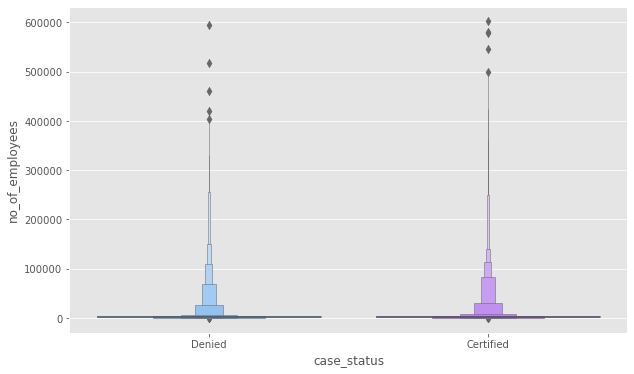

In [23]:
plt.figure(figsize=(10,6))
sns.boxenplot(df["case_status"],df["no_of_employees"],palette="cool")

**Note:**
There is no impact of number of employess on case status

<h1>Model Training and Data preprocessing</h1>

In [24]:
df = df.drop('case_id',axis=1) # Droping the case_id column because it has zero correlation with target column
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [25]:
dtypes = df.dtypes
numeric = dtypes[(dtypes=='int64')|(dtypes=='float64')].index
object_ = dtypes[dtypes=='object'].index
print('Numeric Columns :',numeric)
print('Object Columns :',object_)

Numeric Columns : Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')
Object Columns : Index(['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')


## Data Distribution
It is always good practice to know the distribution of your data before choosing a statistical analysis. ... You can use this feature to check the fit of a single distribution, or to compare the fits of several distributions and select the one that best fits your data.

<AxesSubplot:title={'center':'prevailing_wage'}, xlabel='prevailing_wage', ylabel='Density'>

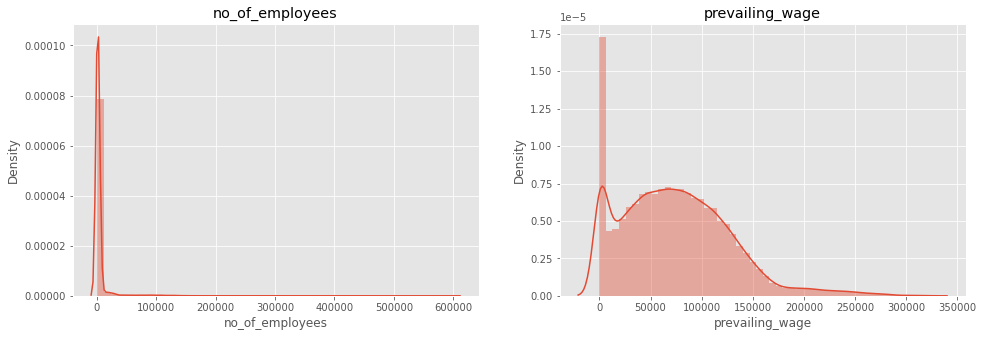

In [26]:
fig , ax = plt.subplots(1,2,figsize=(16,5))
ax[0].title.set_text('no_of_employees')
sns.distplot(df['no_of_employees'],ax=ax[0])
ax[1].title.set_text('prevailing_wage')
sns.distplot(df['prevailing_wage'],ax=ax[1])

<p>I want to see the distribution of numeric columns. So, I plot histograms of two numeric columns because there are only two continous columns. These graphs are showing the distribution of (no_of_employees) and (prevailing_wage) columns.</p></br></br>

<p>1) First plot shows that the distribution is Skewed-positive which is not a normal distribution.</p></br>
<p>2) Second plot shows that the distribution is also Skewed-positive which is not a normal distribution.</p>

## Taking Log of columns

In [27]:
log_df = df.copy()
log_df['no_of_employees'] = [np.log1p(x) for x in df['no_of_employees']]
log_df['prevailing_wage'] = [np.log1p(x) for x in df['prevailing_wage']]

<AxesSubplot:title={'center':'Log of {prevailing_wage}'}, xlabel='prevailing_wage', ylabel='Density'>

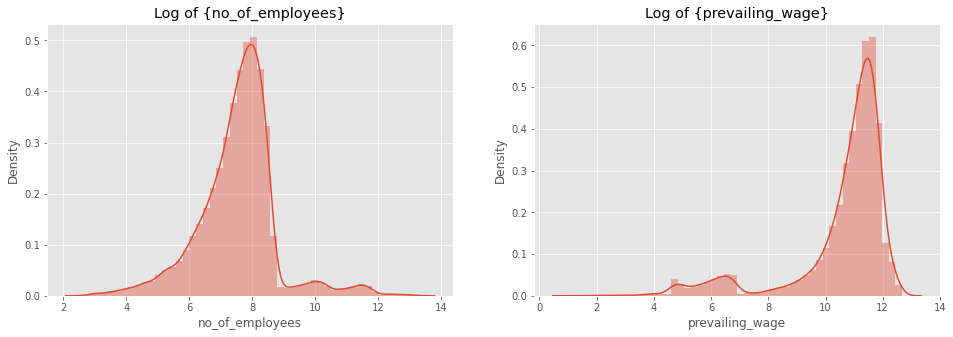

In [28]:
fig , ax = plt.subplots(1,2,figsize=(16,5))
ax[0].title.set_text('Log of {no_of_employees}')
sns.distplot(log_df['no_of_employees'],ax=ax[0])
ax[1].title.set_text('Log of {prevailing_wage}')
sns.distplot(log_df['prevailing_wage'],ax=ax[1])

<p>In the above code i just take the log of (no_of_employees) and (prevailing_wage) columns to check make their distribution normal. Because Normal distribution data is good for Training.</p>
1) First plot shows that the distribution is pretty normal distribution which is acceptable.<br>
2) Second plot shows that the distribution is Skewed-Negative which is not a normal distribution. so, I decide not to take the log of (prevailing_wage) column.

## Separating Multi class and Binary Classes Columns

In [29]:
unique = df.nunique()
binary = unique[unique==2].index
categorical = unique[unique>2].index

## Multi class  and Binary class Labeling

<p>In the below code i just encoding the Binary and Categorical columns by using Sklearn LabelEncoder for categorical and LabelBinarizer for binary columns.</p>

In [30]:
from sklearn.preprocessing import LabelEncoder , LabelBinarizer
df1 = df.copy()
le =  LabelEncoder()
lb = LabelBinarizer()

for x in binary:
    df1[x] = lb.fit_transform(df1[x])
    
for x in categorical:
    df1[x] = le.fit_transform(df1[x])

##  Finding Strong Co-related Columns with Target Column
Correlation explains how one or more variables are related to each other. These variables can be input data features which have been used to forecast our target variable. ... It means that when the value of one variable increases then the value of the other variable(s) also increases.

<p>In this code i plot a correlation plot. Because i want to remove those columns which has a low correlation with Target columns. In this plot you can see that 'yr_of_estab' and 'requires_job_training' have the low correlation values. </p>

<AxesSubplot:title={'center':'Correlations on Feature columns with Target Column'}>

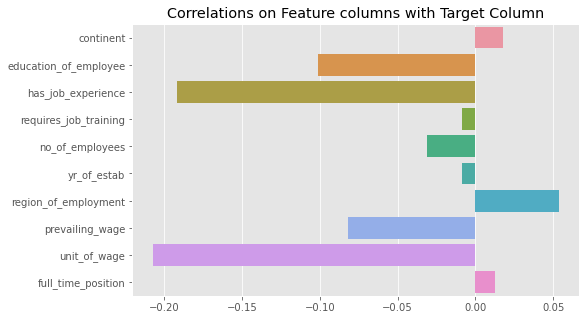

In [31]:
plt.figure(figsize=(8,5))
plt.title('Correlations on Feature columns with Target Column')
sns.barplot(x=df1.drop('case_status',axis=1).corrwith(df1['case_status']).values, 
         y=df1.drop('case_status',axis=1).corrwith(df1['case_status']).index)

<p>In this code, I just take the log of 'no_of_employees' columns and create another dataset.</p>

In [32]:
log = df1.copy()
log['no_of_employees'] = [np.log1p(x) for x in df1['no_of_employees']]

In [33]:
x = log.drop(['case_status','yr_of_estab','requires_job_training'],axis=1)
y = log['case_status']

# Check the balance btw classes
 prediction performance are greatly affected by the level of imbalance in the training data set. They found that the use of balanced training data sets increases the phenotype prediction accuracy compared to imbalanced data sets as measured by the Matthews Correlation Coefficient (MCC)

In [34]:
class_1 = len(log[log['case_status']==1])
class_0 = len(log[log['case_status']==0])
print('Number of 1 class :',class_1)
print('Number of 0 class :',class_0)

Number of 1 class : 8462
Number of 0 class : 17018


<p>You can easily see that there is a big different between 1 and 0 class. So, I have to balance the classes for better training</p>

## OverSampling of Imbalanced data

<p>In this code, I used SMOTE imbalance methode to over sample the class 1.</p>

In [35]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE()
X_res, y_res = sm.fit_resample(x, y)

In [36]:
class_1 = len(y_res[y_res==1])
class_0 = len(y_res[y_res==0])
print('Number of 1 class :',class_1)
print('Number of 0 class :',class_0)

Number of 1 class : 17018
Number of 0 class : 17018


## Data training

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=10)
x_train.shape,y_train.shape,x_test.shape

((27228, 8), (27228,), (6808, 8))

## Data Normalization 
The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. For machine learning, every dataset does not require normalization. It is required only when features have different ranges

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.fit_transform(x_test)

## Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model = lr.fit(X_train,y_train)

<h3><b>Cross Validation Score</b></h3>

In [40]:
from sklearn.model_selection import KFold , cross_val_score
folds = KFold(n_splits=5)
print('The accuracy scores of LogisticRegression is :',cross_val_score(lr,X_train,y_train))

The accuracy scores of LogisticRegression is : [0.67315461 0.68086669 0.68160118 0.67640037 0.67309458]


In [41]:
from sklearn.metrics import accuracy_score, mean_squared_error

## GradientBoostingClassifier

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=1500,learning_rate=0.01)
model = gbc.fit(X_train,y_train)

## Huperparameter Tuning

In [43]:
l_r = [0.001,0.01,0.02,0.05]
error = []
accuracy = []
for r in l_r:
    gbc = GradientBoostingClassifier(n_estimators=1000,learning_rate=r)
    model = gbc.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    err =  mean_squared_error(y_test,y_pred)
    acc =  accuracy_score(y_test,y_pred)
    error.append(err)
    accuracy.append(acc)

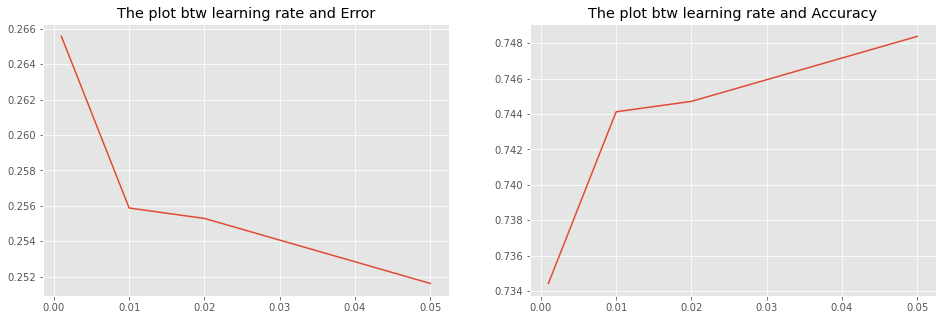

In [44]:
fig , (ax1,ax2) = plt.subplots(1,2,figsize=(16,5))
ax1.title.set_text('The plot btw learning rate and Error')
ax1.plot(l_r,error)
ax2.title.set_text('The plot btw learning rate and Accuracy')
ax2.plot(l_r,accuracy)

<p>Both graphs shows that at 0.01 learning rate the the model has the lowest error and high accuracy.</p>

In [45]:
y_pred = model.predict(X_test)
print('The accuracy scores of LogisticRegression is :',cross_val_score(gbc,X_train,y_train))

The accuracy scores of LogisticRegression is : [0.72769005 0.73466765 0.74770474 0.73351699 0.73645546]


## Classification Reports

In [46]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.74      0.76      0.75      3413
           1       0.75      0.73      0.74      3395

    accuracy                           0.75      6808
   macro avg       0.75      0.75      0.75      6808
weighted avg       0.75      0.75      0.75      6808



Text(33.0, 0.5, 'Actual')

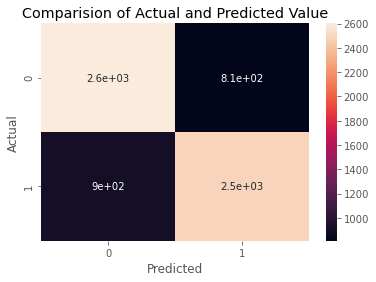

In [47]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.title('Comparision of Actual and Predicted Value')
plt.xlabel('Predicted')
plt.ylabel('Actual')

<p>As you can see that this model shows the accuracy of 75% and the confusion matrix shows that this model correctly predicted 2600  0 class and 2500 1 class out of 6000 values which is good</p>

<h1>Conclusion:</h1>
I have done the data visualization on Easyvisa. I have found many interesting key points to increase the visa success rate. There were very few features to see the outcomes. If there were information about financial support, Documents and Country then I could find much more accurate results but still not bad. I have found a lot of useful information about the visa success rate.
<h3>How to increase chances of getting a Visa approval?</h3>
1) If you have education level more than high school then i will increase the visa approval rate.<br>
2) If the Unit of prevailing wage is Yearly then the approval rate will increase.<br>
3) If you have a job experience then it will much better.<br>
4) IF The year of company establishment is high then the chance of approval will increase. So make sure you have selected the right company.<br>
5) Make sure that the company is located in midwest,south and northeast not on any island.<br>
<h3>Model Results:</h3>
* Model accuracy is greater than <font color="blue">75%</font>.<br>
* Model precision is greater than <font color="blue">75%</font>.<br>
* recall score is <font color="blue">74%</font>.<br>
* f1 score is <font color="blue">73%</font>.<br>
* Column Has_job_exp is higly correlated with target (case_status) column.<br>

**END**